## IS6 in Python: Comparing Groups (Chapter 17)

### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

#### Chapter 17: Comparing Groups

In [88]:
# Read in libraries
import pandas as pd
import numpy as np
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### Section 17.1: A Confidence Interval for the Difference Between Two Proportions

In [41]:
#Create dataframe for seatbelts
seatbelts = np.array(["F", True] * 2777 + ["F", False] * (4208 - 2777) + ["M", True] * 1363 + ["M", False] * (2763 - 1363)).reshape(-1,2)
seatbelts = pd.DataFrame(seatbelts, columns = ["passenger", "belted"])
seatbelts.head()

passenger belted
0         F   True
1         F   True
2         F   True
3         F   True
4         F   True

Question: 
- What is the diffmean() equivalent in Python?
- What is the resample() equivalent in Python? Note, the dataframe.resample() can only work with time series

#### Example 17.1:  Finding the Standard Error of a Difference in Proportions

In [42]:
#Create dataframe for online profiles
online = np.array(["M", True] * 141 + ["M", False] * 107 + ["F", True] * 179 + ["F", False] * 77).reshape(-1,2)
online = pd.DataFrame(online, columns = ["gender", "profile"])
online.head()

gender profile
0      M    True
1      M    True
2      M    True
3      M    True
4      M    True

In [43]:
print(online.groupby("gender").count())

        profile
gender         
F           256
M           248


In [44]:
male = online[online["gender"] == "M"]
num_male = male["gender"].count()
print(f"number of males: {num_male}")

number of males: 248


In [45]:
num_yes_m = male[male["profile"] == "True"]
num_yes_m = num_yes_m["profile"].count()
prop_yes_m = num_yes_m / 248
print(f"proportion of yes male profile: {prop_yes_m}")

proportion of yes male profile: 0.5685483870967742


In [46]:
se_male = ((prop_yes_m * (1 - prop_yes_m)) / num_male) ** 0.5
print(f"standard error of male: {se_male}")

standard error of male: 0.03145023710270326


In [47]:
female = online[online["gender"] == "F"]
num_female = female["gender"].count()
print(f"number of females: {num_female}")

number of females: 256


In [48]:
num_yes_f = female[female["profile"] == "True"]
num_yes_f = num_yes_f["profile"].count()
prop_yes_f = num_yes_f / 256
print(f"proportion of yes female profile: {prop_yes_f}")

proportion of yes female profile: 0.69921875


In [49]:
se_female = ((prop_yes_f * (1 - prop_yes_f)) / num_female) ** 0.5
print(f"standard error of female: {se_female}")

standard error of female: 0.028662358921400885


In [50]:
sep = (se_male ** 2 + se_female ** 2) ** 0.5
print(f"overall SE: {sep}")

overall SE: 0.04255171245385386


#### Example 17.2: Finding a Two-Proportion z-Interval 

In [51]:
zstats = norm.ppf([.025, .975])
print((prop_yes_f - prop_yes_m) + zstats * sep)

[0.04727054 0.21407019]


Question: What is the prop.test() equivalent in Python?

#### Section 17.2: Assumptions and Conditions for Comparing Proportions
#### Section 17.3: The Two-Sample z-Test: Testing for the Difference Between Proportions
#### Step-By-Step Example: A Two-Proportion z-Test

In [52]:
#Create dataframe for sleep habits
sleep = np.array(["GenY", True] * 205 + ["GenY", False] * (293 - 205) + ["GenX", True] * 235 + ["GenX", False] * (469 - 235)).reshape(-1,2)
sleep = pd.DataFrame(sleep, columns = ["gen", "internet"])
sleep.head()

gen internet
0  GenY     True
1  GenY     True
2  GenY     True
3  GenY     True
4  GenY     True

In [53]:
#Mechanics
#n for GenY
n_y = sleep[sleep["gen"] == "GenY"].count()[0]
print(n_y)

293


In [54]:
#y for GenY
y_y = sleep[(sleep["gen"] == "GenY") & (sleep["internet"] == "True")].count()[0]
print(y_y)

205


In [55]:
#proportion for GenY
p_y = y_y / n_y
print(p_y)

0.6996587030716723


In [56]:
#n for GenX
n_x = sleep[sleep["gen"] == "GenX"].count()[0]
print(n_x)

469


In [57]:
#y for GenX
y_x = sleep[(sleep["gen"] == "GenX") & (sleep["internet"] == "True")].count()[0]
print(y_x)

235


In [58]:
#proportion for GenX
p_x = y_x / n_x
print(p_x)

0.5010660980810234


In [59]:
#overall SE
sepgen = ((p_y * (1 - p_y)) / n_y + (p_x * (1 - p_x)) / n_x) ** 0.5
print(sepgen)

0.03535867225219601


In [60]:
#Difference between proportions
pdiff = p_y - p_x
print(pdiff)

0.1985926049906489


In [61]:
z = (pdiff - 0) / sepgen
print(z)

5.616517599252188


In [65]:
print(2 * norm.sf(x = z))

1.9484441249264696e-08


#### Section 17.4: A Confidence Interval for the Difference Between Two Means
#### Example 17.7: Finding a Confidence Interval for the Difference in Sample Means
We can calculate the confidence interval using summary statistics.

In [71]:
# page 585
# n for ordinary bowls
nord = 27 
# n for refilling bowls
nref = 27 
# y for ordinary bowls
yord = 8.5 
# y for refilling bowls
yref = 14.7 
# standard deviation for ordinary bowls
sord = 6.1 
# standard deviation for refilling bowls
sref = 8.4 
# overall SE
seys = 2.0 
# difference between y's is 6.2
diffy = yref - yord 
#t.ppf() is the inverse of cdf. In other words, ppf() is the inverse cumulative density function using a student-t distribution
tstats = t.ppf(q = [.025, .975], df = 47.46)
print(tstats)

[-2.01122593  2.01122593]


In [72]:
# margin of error
me = tstats * seys
print(me)

[-4.02245186  4.02245186]


In [73]:
# confidence interval
print(diffy + me)

[ 2.17754814 10.22245186]


#### Section 17.5: The Two-Sample t-Test: Testing for the Difference Between Two Means
#### Step-By-Step Example: A Two-Sample t-Test for the Difference Between Two Means

In [74]:
# Page 587
buy = pd.read_csv("datasets/buy-from-a-friend.txt", sep = "\t")
buy.head()

Friend  Stranger
0     275     260.0
1     300     250.0
2     260     175.0
3     300     130.0
4     255     200.0

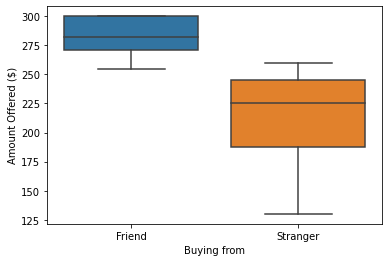

In [78]:
sns.boxplot(data = buy)
plt.xlabel("Buying from")
plt.ylabel("Amount Offered ($)")
plt.show()

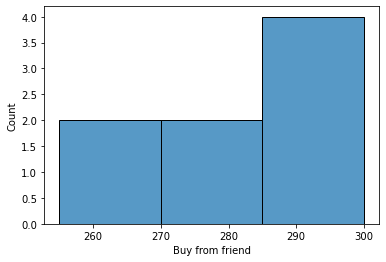

In [85]:
sns.histplot(data = buy["Friend"], bins = 3)
plt.xlabel("Buy from friend")
plt.show()

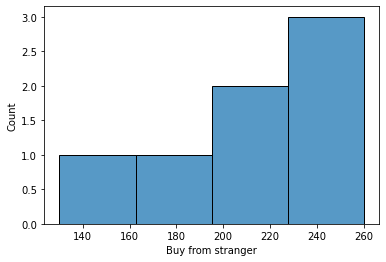

In [86]:
sns.histplot(data = buy["Stranger"], bins = 4)
plt.xlabel("Buy from stranger")
plt.show()

We can replicate the analyses on pages 588 - 589

In [87]:
print(buy.describe())

           Friend    Stranger
count    8.000000    7.000000
mean   281.875000  211.428571
std     18.310321   46.432234
min    255.000000  130.000000
25%    271.250000  187.500000
50%    282.500000  225.000000
75%    300.000000  245.000000
max    300.000000  260.000000


In [103]:
buy = buy.dropna()
# To perform Welch’s t-test, which does not assume equal population variance, use argument equal_var = False
stat, p = ttest_ind(buy["Friend"], buy["Stranger"], equal_var = False)

# Display the results
print("p-values:", p)
print("t-test:", stat)

p-values: 0.007284631910567961
t-test: 3.601828317074927


Question: I need to double check the code above. I used the teaching code but did not get the same result shown in the book. One possible explanation is that my dataset is missing 1 example

#### Random Matters: Randomization Tests for The Difference Between Two Means

In [97]:
#Page 591 - 592
car = pd.read_csv("datasets/car-speeds.txt", sep = "\t")
car.head()

direction  speed
0        Up  22.77
1        Up  28.19
2      Down  20.96
3      Down  19.97
4        Up  30.12

In [96]:
print(car.groupby("direction").describe())

           speed                                                            
           count      mean       std    min      25%     50%      75%    max
direction                                                                   
Down       250.0  22.71708  3.622006  10.27  20.4675  22.885  25.3525  32.95
Up         250.0  25.25172  3.856331  15.08  22.4975  25.155  28.1600  34.97


Question: (same as above)
- What is the diffmean() equivalent in Python?
- What is the resample() equivalent in Python?
- What is the qdata() equivalent in Python?

Note: I think I know how how to shuffle() in Python, the only thing I need now is diffmean()

#### Section 17.7: Pooling

In [102]:
buy = pd.read_csv("datasets/buy-from-a-friend.txt", sep = "\t")
buy = buy.dropna()
# The pooled variance ttest can be generated by using the option equal_var = True (which is by default)
stat, p = ttest_ind(buy["Friend"], buy["Stranger"], equal_var = True)

# Display the results
print("p-values:", p)
print("t-test:", stat)

p-values: 0.003633696538991698
t-test: 3.601828317074927


Question: Same as above, need to double check the code above. I used the teaching code but did not get the same result shown in the book. One possible explanation is that my dataset is missing 1 example. Also, I don't see this example in the new version

#### Section 17.8: The Standard Deviation of a Difference